In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sgd import SGD
from utils import read_data_breast_cancer, generate_data, plot_result

# Experiment

Vecteur de poids appris w* : [ 1.         -0.50866479]


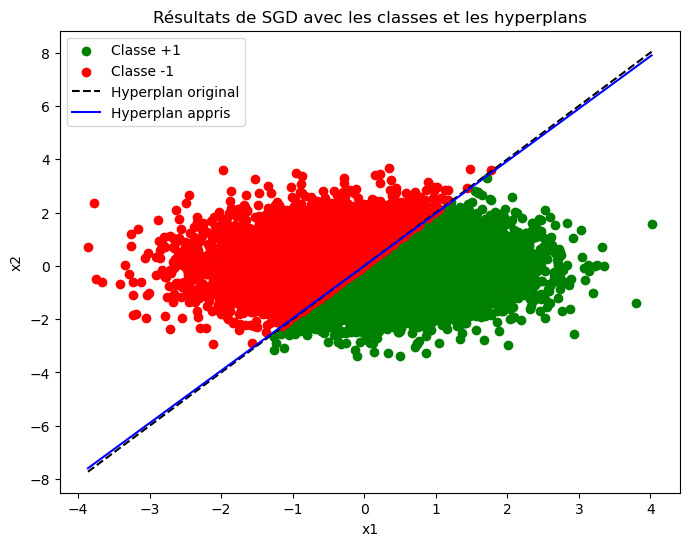

'Score:  99.78%'

In [3]:
# Generate data
n_points = 10_000
w_barre = np.array([1.0, -0.5])
X, y = generate_data(n_points=n_points, w_barre=w_barre)

# Train SGD
sgd = SGD(X, y, gamma=1e-2, n_iter=100_000)
sgd.fit()
w_star = sgd.weights

# Print the vector othogonal to the hyperplan
print("Vecteur de poids appris w* :", w_star/w_star[0])

# Plot the result
plot_result(X, y, w_barre, w_star)

f"Score: {sgd.score(X, y)*100: .2f}%"

# Gaussian noise

Vecteur de poids appris w* : [ 1.         -0.47710468]


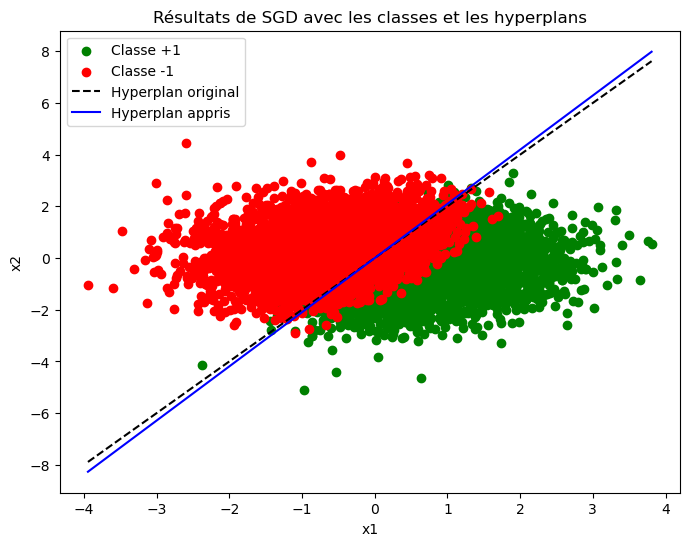

'Score:  86.26%'

In [4]:
# Generate noisy data
n_points = 10_000
w_barre = np.array([1.0, -0.5])
X_noisy, y_noisy = generate_data(n_points=n_points, w_barre=w_barre, noisy=True)

# Train SGD
w_star_noisy = SGD(X_noisy, y_noisy, gamma=1e-2, n_iter=100_000).fit()

# Print the vector othogonal to the hyperplan
print("Vecteur de poids appris w* :", w_star_noisy/w_star_noisy[0])

# Plot the result
plot_result(X_noisy, y_noisy, w_barre, w_star_noisy)

f"Score: {sgd.score(X_noisy, y_noisy)*100: .2f}%"


We can see that with noisy data the SGD is still able to find the best hyperplan.

# Implementation on Breast Cancer Wisconsin (Diagnostic) Data Set

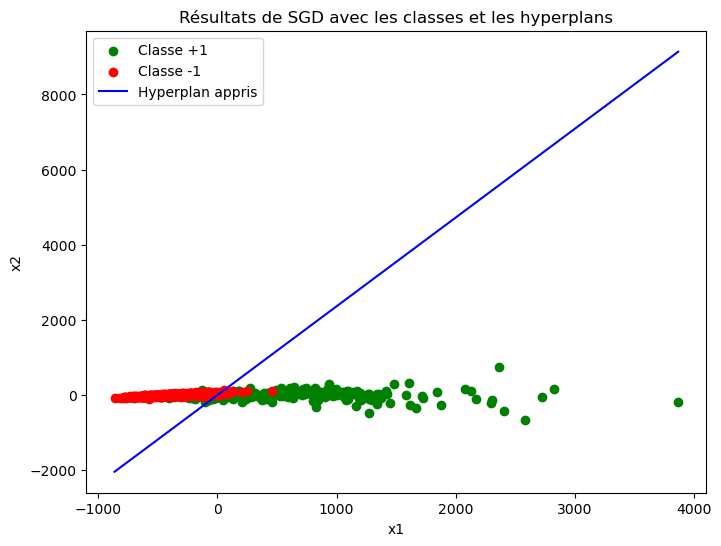

'Score:  91.74%'

In [5]:
from sklearn.decomposition import PCA

X, y = read_data_breast_cancer()

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
w_star = SGD(X_PCA, y.values, gamma=1e-6, n_iter=100_000).fit()
plot_result(X_PCA, y, w_barre=None, w_star=w_star)

f"Score: {sgd.score(X_PCA, y)*100: .2f}%"

With a simple PCa on 2-dimension we have satisfying results.

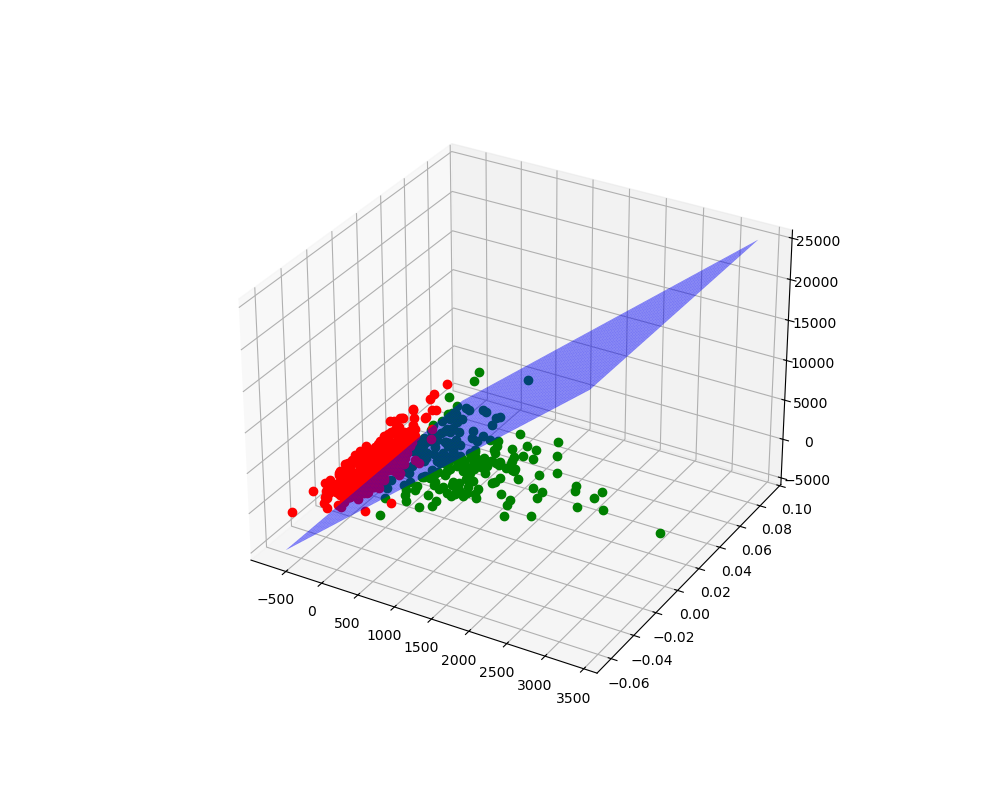

'Score:  91.92%'

In [6]:
# 3D plot
%matplotlib ipympl

# Select the 3 most important features according to the documentation
X = X.loc[:, ['Area_Worst', 'Smoothness_Worst', "Texture_Mean"]].astype(float)

# Train SGD
sgd = SGD(X.values, y.values, gamma=1e-12, n_iter=100_000)
sgd.fit()
w_star = sgd.weights

# Construct the hyperplane from w_star
hyperplane_X = np.linspace(X["Area_Worst"].min(), X["Area_Worst"].max(), 120)
hyperplane_Y = np.linspace(X["Smoothness_Worst"].min(), X["Smoothness_Worst"].max(), 120)
hyperplane_X, hyperplane_Y = np.meshgrid(hyperplane_X, hyperplane_Y)
hyperplane_Z = -(w_star[0] * hyperplane_X + w_star[1] * hyperplane_Y) / w_star[2]
hyperplane_Z = hyperplane_Z.reshape(hyperplane_X.shape)

# Plot the result
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot(X.loc[y == 1, X.columns[0]], X.loc[y == 1, X.columns[1]], X.loc[y == 1, X.columns[2]], 'go', label='Classe +1')
ax.plot(X.loc[y == -1, X.columns[0]], X.loc[y == -1, X.columns[1]], X.loc[y == -1, X.columns[2]], 'ro', label='Classe -1')
ax.plot_surface(hyperplane_X, hyperplane_Y, hyperplane_Z, color='blue', alpha=0.5)
plt.show()

f"Score: {sgd.score(X, y.values)*100: .2f}%"